## Loop model with crossing
* [https://arxiv.org/pdf/1303.2342.pdf](https://arxiv.org/pdf/1303.2342.pdf)

In [2]:
using Random
using Statistics
using Plots

In [3]:
function product_state(n)
    state = Array{UInt64}(1:n)
    state[1:2:end], state[2:2:end] = state[2:2:end], state[1:2:end]
    return state
end

function one_layer_update!(state, p)
    n = size(state, 1)
    for i in 1:2:(n-1)
        a, b = state[i], state[i+1]
        (a == i+1) && continue
        if rand() < p
            state[i], state[i+1] = b, a
            state[a], state[b] = i+1, i
        elseif rand() < 0.5
            state[a], state[b] = b, a
            state[i], state[i+1] = i+1, i
        end
    end
    for i in 2:2:(n-1)
        a, b = state[i], state[i+1]
        (a == i+1) && continue
        if rand() < p
            state[i], state[i+1] = b, a
            state[a], state[b] = i+1, i
        elseif rand() < 0.5
            state[a], state[b] = b, a
            state[i], state[i+1] = i+1, i
        end
    end
    return state
end

function correlation_across_all_cuts(state)
    n = size(state, 1)
    results = zeros(Int, n)
    current_val = 0
    for i in 1:n
        if state[i] > i
            current_val += 1
        else
            current_val -= 1
        end
        results[i] = current_val
    end
    return results
end

function arc_length_statistics(state)
    n = size(state, 1)
    result = zeros(Int, n)
    for i in 1:n
        if tmp[i] > i
            result[tmp[i] - i] += 1
        end
    end
    return result
end

arc_length_statistics (generic function with 1 method)

a = 1
a = 2
a = 3
a = 4
a = 5
a = 6
a = 7
a = 8
a = 9
a = 10
a = 11
a = 12
a = 13
a = 14
a = 15
a = 16
a = 17
a = 18
a = 19
a = 20
a = 21
a = 22
a = 23
a = 24
a = 25
a = 26
a = 27
a = 28
a = 29
a = 30
a = 31
a = 32
a = 33
a = 34
a = 35
a = 36
a = 37
a = 38
a = 39
a = 40
a = 41
a = 42
a = 43
a = 44
a = 45
a = 46
a = 47
a = 48
a = 49
a = 50
a = 51
a = 52
a = 53
a = 54
a = 55
a = 56
a = 57
a = 58
a = 59
a = 60
a = 61
a = 62
a = 63
a = 64
a = 65
a = 66
a = 67
a = 68
a = 69
a = 70
a = 71
a = 72
a = 73
a = 74
a = 75
a = 76
a = 77
a = 78
a = 79
a = 80
a = 81
a = 82
a = 83
a = 84
a = 85
a = 86
a = 87
a = 88
a = 89
a = 90
a = 91
a = 92
a = 93
a = 94
a = 95
a = 96
a = 97
a = 98
a = 99
a = 100


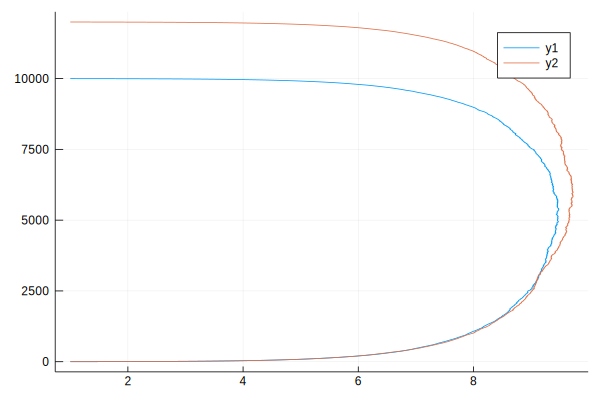

In [4]:
n = 10000
m = 12000

lag = 10 * n
step = n
t = 100

result1 = zeros(Int, n)
result2 = zeros(Int, m)
state1 = product_state(n)
state2 = product_state(m)


for _ in 1:lag
    one_layer_update!(state1, 0.5)
    one_layer_update!(state2, 0.5)
end
for a in 1:t
    @show a
    for _ in 1:step   
        one_layer_update!(state1, 0.5)
        one_layer_update!(state2, 0.5)
        result1 += correlation_across_all_cuts(state1)
        result2 += correlation_across_all_cuts(state2)
    end
end

result1 = (result1 ./ t ./ step)[1:2:end]
result2 = (result2 ./ t ./ step)[1:2:end]

plot()
plot!(result1, 1:2:n)
plot!(result2, 1:2:m)

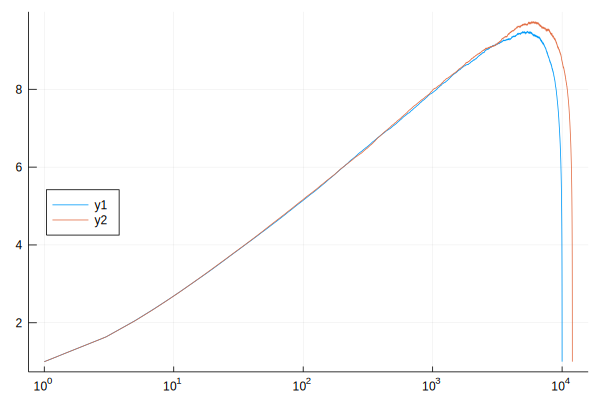

In [9]:
Plots.plot()
plot!(1:2:n, result1)
plot!(1:2:m, result2)
plot!(xaxis=:log, legend=:left)
# plot!(yaxis=:log)